In [1]:
%run ./PPS_Expansion_Model.ipynb

/home/renato-paredes/.virtualenvs/gifted/lib/python3.13/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


In [ ]:
# Start by building the inflexible parameters

Wt, Wa, Wv, Bt, Ba, Bv = FwFb(
    6.5, 6.5, 6.5, 6.55, 6.55, 6.55, 1.083e01, 5.076e02, 3.226e01, 9.968e-01
)
# feedforward and feedback
Wat, Wvt, Wav = crossmodal(0.05, 2, 0.05, 2, 0.05, 2)
Lt, La, Lv = Lw(0.15, 0.05, 1, 4, 0.15, 0.05, 20, 80, 0.15, 0.05, 2, 8)

In [29]:
# Distance points in cm (network coordinates)
s_distances = np.asarray([2700, 2200, 1500, 800, 300]) / 1000
v = 30  # cm/s
simtime = 200.0
ts = 0.4

possible_distances = np.arange(5, 105, 10)
dis_RTs = []
dis = []

for n_distances in possible_distances:
    s_distances_sec = np.linspace(s_distances[0], s_distances[-1], n_distances)
    a_distances = (
        100 - s_distances_sec * v
    )  # distance points in cm (network coordinates)
    _, _, _, _, RTs = experiment(
        ts,
        simtime,
        a_distances,
        5,
        Lt,
        La,
        Lv,
        Wt,
        Wa,
        Wv,
        Bt,
        Ba,
        Bv,
        Wat,
        Wvt,
        Wav,
        0,
        0,
    )
    dis_RTs.append(RTs)
    dis.append(a_distances)

In [30]:
Lcp = np.zeros(len(dis_RTs))
Lslope = np.zeros(len(dis_RTs))

for i in range(len(dis_RTs)):
    RTs = dis_RTs[i]
    a_distances = dis[i]

    ymin = np.min(RTs)
    ymax = np.max(RTs)

    Lcp[i], Lslope[i] = fitting(a_distances, RTs)

Text(0.5, 0, 'Number of distance points')

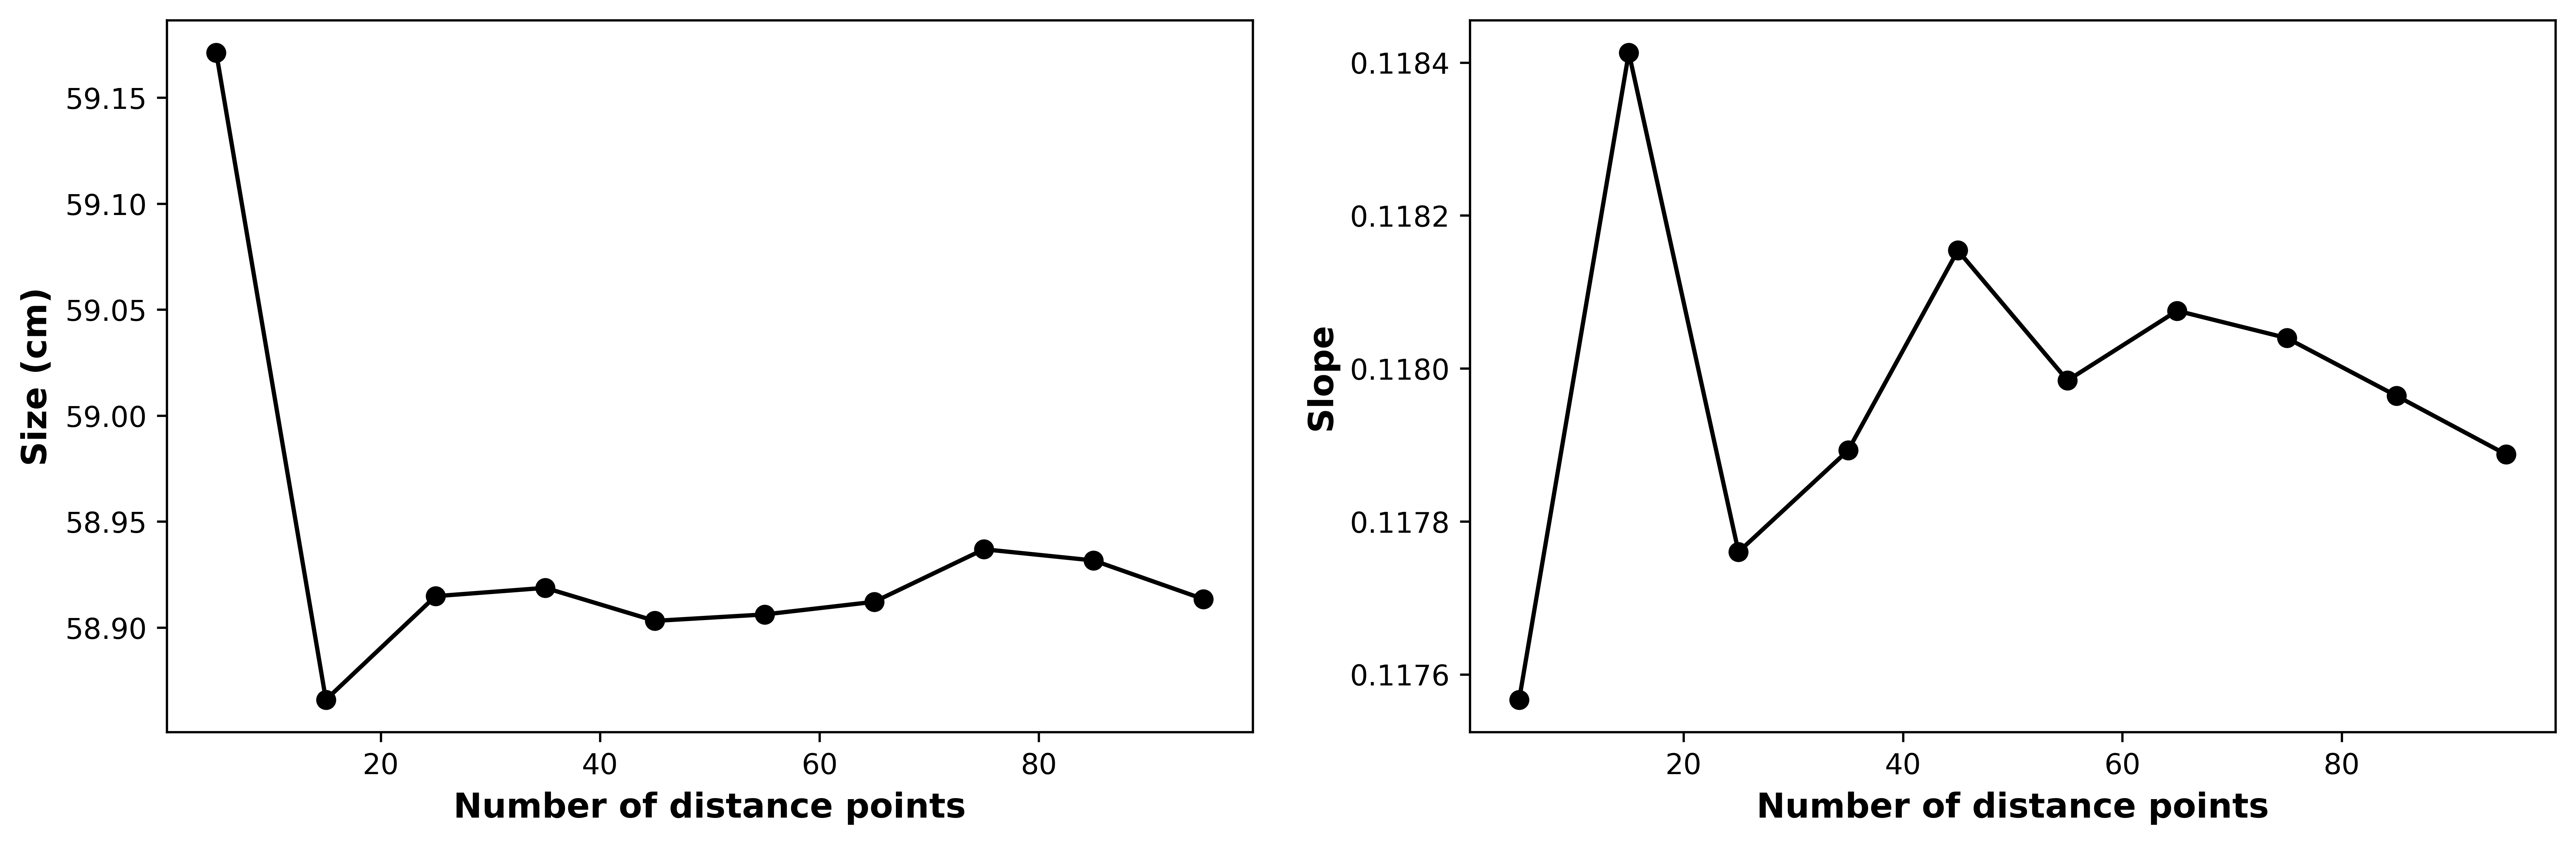

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4.5), dpi=600)

ax1 = plt.subplot(121)
ax1.plot(
    possible_distances,
    Lcp,
    color="k",
    marker="o",
)
ax1.set_ylabel("Size (cm)", size=12, weight="bold")
ax1.set_xlabel("Number of distance points", size=12, weight="bold")

ax2 = plt.subplot(122)
ax2.plot(
    possible_distances,
    1 / Lslope,
    color="k",
    marker="o",
)
ax2.set_ylabel("Slope", size=12, weight="bold")
ax2.set_xlabel("Number of distance points", size=12, weight="bold")